In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tools

In [3]:
hdul=fits.open("advact_tt_patch.fits")
mymap=hdul[0].data
hdul.close()
mymap=np.asarray(mymap,dtype='float')

In [4]:
nx,ny = mymap.shape
width=10    #snip out a small patch that's reasonably well described by a gaussian

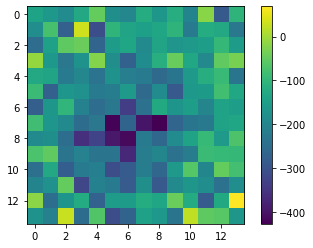

In [5]:
plt.imshow(mymap[nx//2-width-2+3:nx//2+width-2-3,ny//2-width-2+4:ny//2+width-2-2],aspect='equal')
plt.colorbar()

In [6]:
ss=mymap[nx//2-width-2+3:nx//2+width-2-3,ny//2-width-2+4:ny//2+width-2-2].copy()
print(ss.shape)

(14, 14)


In [7]:
snip=ss.copy()

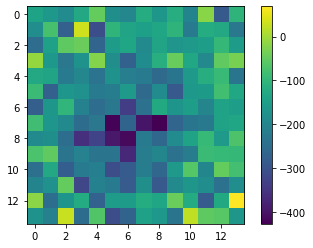

In [8]:
plt.imshow(snip,aspect='equal')
plt.colorbar()

In [9]:
width=ss.shape[0]//2

In [10]:
params = [-1,1,-1,3,5]
mygauss = tools.gauss2d(params,width)

#make a template to fit

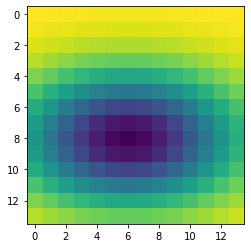

In [9]:
plt.imshow(mygauss,aspect='equal')

In [11]:
dp = np.asarray([0.001,0.001,0.001,0.001,0.001])/10

#starting guess
params = [-1,1,-1,3,5]
#let's fit a gaussian to snip
y=np.ravel(snip)

print(y.shape)
fitp,pcov=tools.fit_lm(tools.gauss2d,params,y,dp,width,lmbda=10,niter=50000,rtol=1e-8)

(196,)
init pars are: [-1, 1, -1, 3, 5]
yep
5 len pars
on iteration  0  chisq is  7658786.512572496  taking step  [-274.09442708  -22.72216921   -6.62489763  132.39545942   25.77045316] with lambda  10
5 len pars
step accepted. new m is [-274.09442708  -22.72216921   -6.62489763  132.39545942   25.77045316]
on iteration  1  chisq is  2744005.135615076  taking step  [-190.86077048  -33.24576796   16.51989091  132.42046582  -38.65227433] with lambda  6.666666666666667
5 len pars
step accepted. new m is [-190.86077048  -33.24576796   16.51989091  132.42046582  -38.65227433]
on iteration  2  chisq is  1562221.4875600683  taking step  [-139.41690869  -35.29276718   -8.22000156  134.7917322   -50.93926774] with lambda  4.444444444444445
5 len pars
step rejected. old m is [-190.86077048  -33.24576796   16.51989091  132.42046582  -38.65227433]
on iteration  3  chisq is  1562221.4875600683  taking step  [-237.29531694  -14.75558783    3.13168719  138.3989173   -22.69580384] with lambda  8.88888

step rejected. old m is [-229.10662498   40.50852823   -1.34426616  126.91845164   -5.96596925]
on iteration  50  chisq is  1243331.3025186523  taking step  [-229.02587871   41.04795304   -1.3019722   126.55215859   -5.6676012 ] with lambda  164.05270524109457
5 len pars
step rejected. old m is [-229.10662498   40.50852823   -1.34426616  126.91845164   -5.96596925]
on iteration  51  chisq is  1243331.3025186523  taking step  [-229.76935977   40.36080723   -1.39559622  126.86731083   -6.328007  ] with lambda  328.10541048218914
5 len pars
step rejected. old m is [-229.10662498   40.50852823   -1.34426616  126.91845164   -5.96596925]
on iteration  52  chisq is  1243331.3025186523  taking step  [-229.31626708   40.50771668   -1.29913773  126.86979447   -5.67898836] with lambda  656.2108209643783
5 len pars
step rejected. old m is [-229.10662498   40.50852823   -1.34426616  126.91845164   -5.96596925]
on iteration  53  chisq is  1243331.3025186523  taking step  [-229.27471494   40.4718997 

on iteration  140  chisq is  1206328.1310130125  taking step  [-250.16675814    9.50537532   -1.34046482   22.90956249   -5.73818247] with lambda  31432.41578622694
5 len pars
step accepted. new m is [-250.16675814    9.50537532   -1.34046482   22.90956249   -5.73818247]
on iteration  141  chisq is  1206290.5424436554  taking step  [-250.15812854    9.49288765   -1.34154553   22.88275585   -5.74331644] with lambda  20954.943857484624
5 len pars
step accepted. new m is [-250.15812854    9.49288765   -1.34154553   22.88275585   -5.74331644]
on iteration  142  chisq is  1206248.394149487  taking step  [-250.14506754    9.47402781   -1.34219244   22.84260157   -5.7456346 ] with lambda  13969.962571656417
5 len pars
step accepted. new m is [-250.14506754    9.47402781   -1.34219244   22.84260157   -5.7456346 ]
on iteration  143  chisq is  1206188.0346188517  taking step  [-250.12550527    9.44435      -1.34248567   22.78295945   -5.7466731 ] with lambda  9313.308381104278
5 len pars
step ac

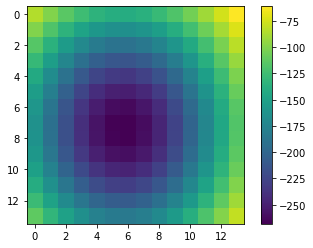

In [13]:
mygauss = tools.gauss2d(fitp,width)
plt.imshow(mygauss,aspect='equal')
plt.colorbar()
#seeing what we fit

73.85122747111409 stddev of resiudals


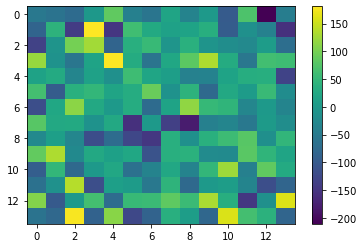

In [14]:
predsnip = tools.gauss2d(fitp,width)
res=snip-predsnip
print(res.std(), "stddev of resiudals")
plt.imshow(res,aspect='auto')
plt.colorbar()


81.03105330674161

## Adding a rotation will help. but residual RMS (60) are lower than signal level (300) in the map.